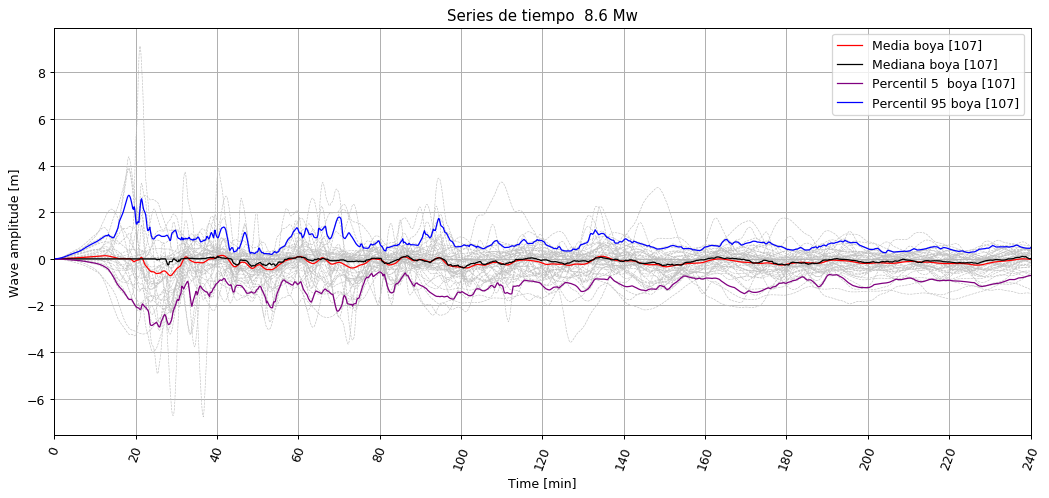

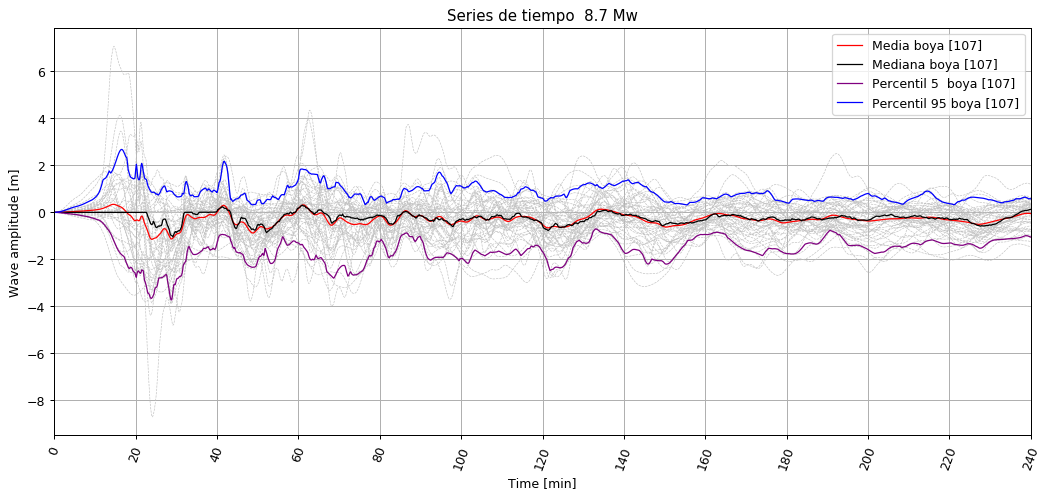

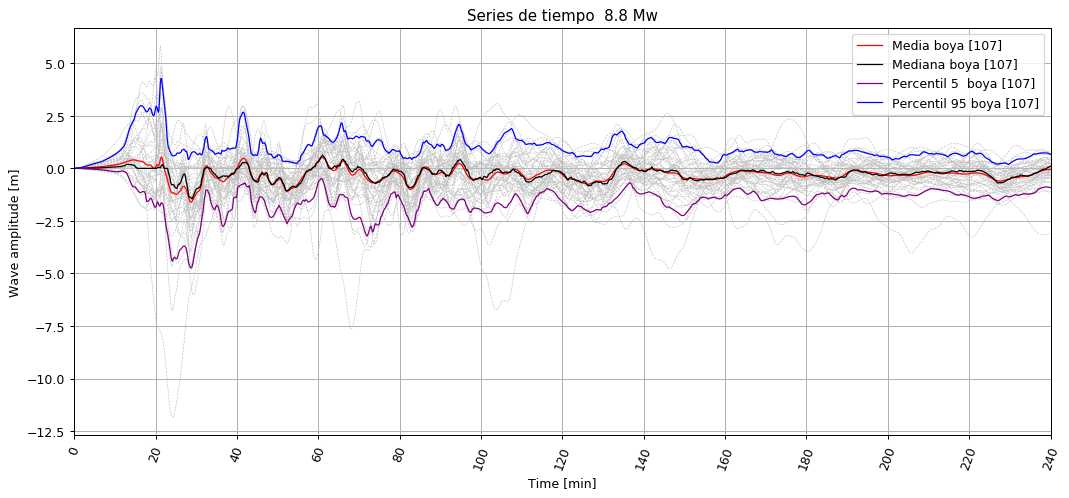

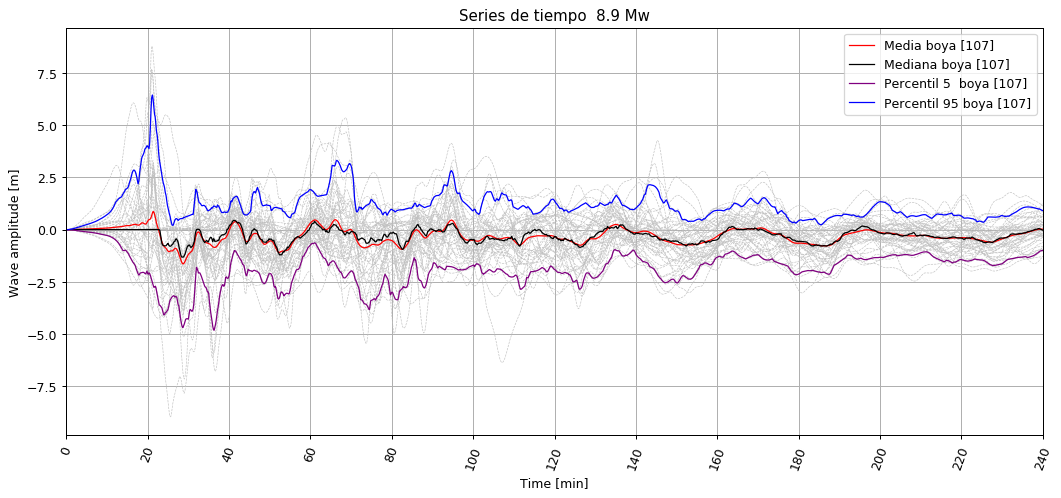

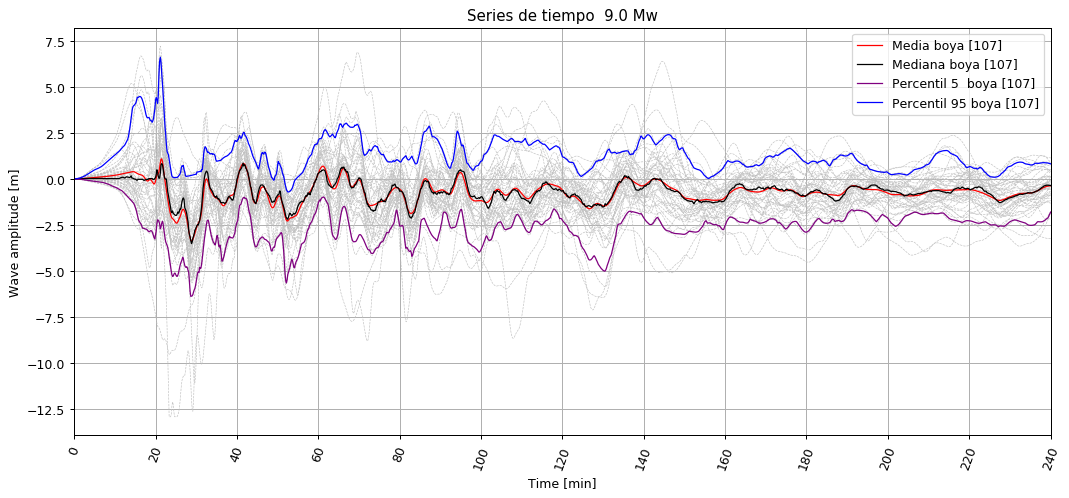

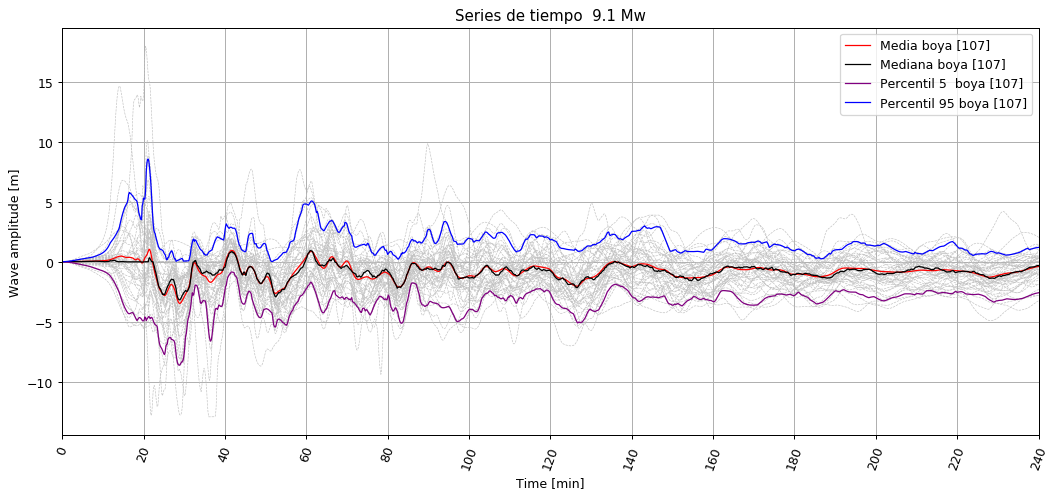

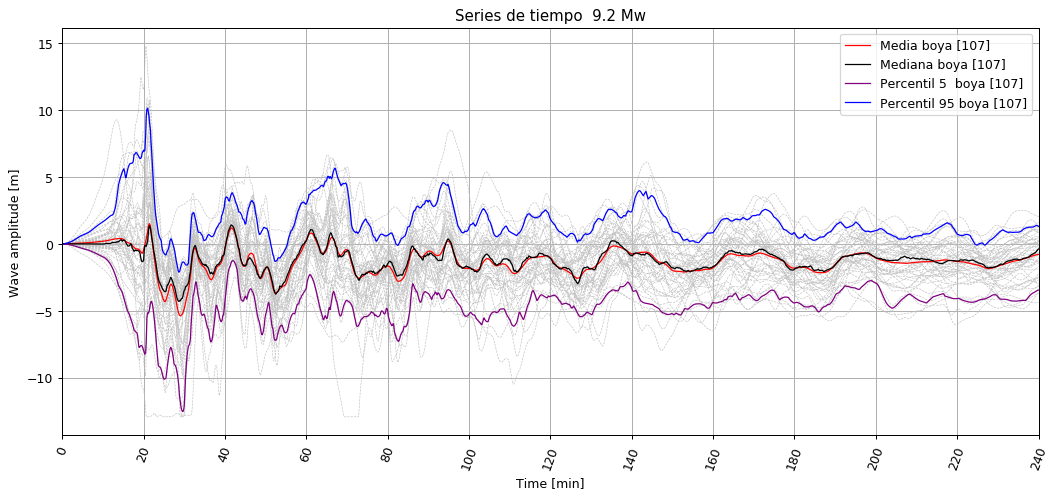

In [1]:
from netCDF4 import Dataset
import numpy as np
import os
import shutil
import pandas as pd
import matplotlib.pyplot as plt

i = [107]

Folder = '/home/jorge/natalia/resul_series_sce400'

folders = os.listdir(Folder)# lista con carpetas en sce400
folders.sort()

for fol in folders: #recorre carpetas magnitudes
    #print(fol)
    escenario = os.listdir(Folder+'/'+fol)
    escenario.sort()
    
    for e in escenario :#recorre distintos escenarios dentro de cada magnitud
        files = os.listdir(Folder+'/'+fol+'/'+e)
        #print(files)
        figure = plt.figure(figsize=(14,6), dpi=90) 
        ax = figure.add_axes()
        data = {}
        for file in files:
            rutafile = Folder+'/'+fol+'/'+e+'/'+file+'/'+'level01_ts.nc'
            f=Dataset(rutafile,'r') # abrir file
            eta = f.variables['eta'][:,i] -f.variables['eta'][:,i][0]# inundacion
            shapes=eta.data.shape
            eta =  np.concatenate(eta.data).tolist()
            
            data['boya '+str(i[0])+'_'+file ]= eta
        eta_media = np.zeros(shapes)
        data = pd.DataFrame(data)
        cont = 0
        estad = data.T.describe(percentiles=[0.05,0.5,0.95])
        for file in files:
            cont+=1
            
            rutafile = Folder+'/'+fol+'/'+e+'/'+file+'/'+'level01_ts.nc'
            #print(rutafile)
            f=Dataset(rutafile,'r') # abrir file
            #for tipo_boya, boya in boyas.items():
            
            #for i in boyas:
            time = f.variables['time'][:]/60
            eta = f.variables['eta'][:,i] -f.variables['eta'][:,i][0]# inundacion
            eta_media+=eta
            plt.plot(time,eta,color = 'silver',linewidth=0.5, linestyle="--")
            if cont == len(files):
                #plt.plot(time,eta_media/len(files),color = 'black',linewidth=1.0, linestyle="-",label = 'Media boya '+str(i))
                plt.plot(time,estad.loc['mean'],color = 'red',linewidth=1.0, linestyle="-",label = 'Media boya '+str(i))
                plt.plot(time,estad.loc['50%'],color = 'black',linewidth=1.0, linestyle="-",label = 'Mediana boya '+str(i))
                plt.plot(time,estad.loc['5%'],color = 'purple',linewidth=1.0, linestyle="-",label = 'Percentil 5  boya '+str(i))
                plt.plot(time,estad.loc['95%'],color = 'blue',linewidth=1.0, linestyle="-",label = 'Percentil 95 boya '+str(i))
                plt.legend(loc='upper right')
            plt.title('Series de tiempo '+' '+fol[-2]+'.'+fol[-1]+' Mw')
            plt.ylabel('Wave amplitude [m]')
            plt.xlabel('Time [min]')
            plt.xticks(np.arange(min(time),max(time),20))
            plt.xticks(rotation=70)
            plt.xlim(0,240)
            #folderout = folder+ tipo_boya
            #print(folderout)
            #if not os.path.exists(folderout): # crea folder si no existe
              #  os.makedirs(folderout)

            #figure.savefig(folderout+'/'+file.split('.nc')[0]+'.png',
             #              dpi=300,bbox_inches = 'tight',pad_inches = 0)
        plt.grid()
        plt.show()
   